Mini Project 2

In [53]:
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
import pandas as pd
import math
# import statsmodels.api as sm
from sklearn.model_selection import train_test_split

dataset = pd.read_csv("Apple462.csv")
dataset

netherlands_dataset = dataset[dataset['region'] == 'Netherland']
netherlands_dataset.drop(['Unnamed: 0'], axis=1, inplace=True)
netherlands_dataset

C:\Users\maiwi\AppData\Local\Temp\ipykernel_4232\3388204304.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netherlands_dataset.drop(['Unnamed: 0'], axis=1, inplace=True)


,Date,Envi,Fuji,Gala,region
884,27/12/2015,389773.0,288004.0,126151.0,Netherland
885,20/12/2015,382444.0,278067.0,127372.0,Netherland
886,13/12/2015,412188.0,386865.0,81450.0,Netherland
887,6/12/2015,368529.0,490805.0,7041.0,Netherland
888,29/11/2015,391617.0,289534.0,4335.0,Netherland
...,...,...,...,...,...
3508,4/2/2018,952747.0,300383.0,7990.0,Netherland
3509,28/1/2018,832419.0,103716.0,17666.0,Netherland
3510,21/1/2018,651433.0,153445.0,10598.0,Netherland
3511,14/1/2018,548774.0,292562.0,6066.0,Netherland


In [54]:
netherlands_dataset.count()

Date      169
Envi      165
Fuji      164
Gala      168
region    169
dtype: int64

In [55]:
avg_Envi = math.ceil(netherlands_dataset['Envi'].sum() / len(netherlands_dataset['Envi']))
avg_Fuji = math.ceil(netherlands_dataset['Fuji'].sum() / len(netherlands_dataset['Fuji']))
avg_Gala = math.ceil(netherlands_dataset['Gala'].sum() / len(netherlands_dataset['Gala']))

print(avg_Envi)
print(avg_Fuji)
print(avg_Gala)

netherlands_dataset['Envi'].fillna(avg_Envi, inplace=True)
netherlands_dataset['Fuji'].fillna(avg_Fuji, inplace=True)
netherlands_dataset['Gala'].fillna(avg_Gala, inplace=True)

netherlands_dataset.count()


568029
273931
32268


C:\Users\maiwi\AppData\Local\Temp\ipykernel_4232\3149751567.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netherlands_dataset['Envi'].fillna(avg_Envi, inplace=True)
C:\Users\maiwi\AppData\Local\Temp\ipykernel_4232\3149751567.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netherlands_dataset['Fuji'].fillna(avg_Fuji, inplace=True)
C:\Users\maiwi\AppData\Local\Temp\ipykernel_4232\3149751567.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Date      169
Envi      169
Fuji      169
Gala      169
region    169
dtype: int64

In [56]:
# # Envi 
# # graph size
# plt.figure(figsize=(25, 10))
# plt.plot(netherlands_dataset['Date'], netherlands_dataset['Envi'], color='b')

# # set name gan x
# plt.xlabel('Date')

# plt.ylabel('Envi Price')
# plt.yscale('log')

# plt.title('Envi Price Over Time')
# plt.xticks(rotation=90, fontsize=10) 
# plt.tight_layout()

# # show graph
# plt.show()

In [63]:
netherlands_dataset['Date']
netherlands_dataset = netherlands_dataset.sort_values(by='Date')
netherlands_dataset

,Date,Envi,Fuji,Gala,region,year,month,day,Date_ordinal
935,2015-01-04,506427.0,436348.0,4379.0,Netherland,2015,1,4,735602
934,2015-01-11,463273.0,441786.0,4094.0,Netherland,2015,1,11,735609
933,2015-01-18,458532.0,429687.0,9354.0,Netherland,2015,1,18,735616
932,2015-01-25,549415.0,309975.0,4231.0,Netherland,2015,1,25,735623
931,2015-02-01,540024.0,597856.0,8063.0,Netherland,2015,2,1,735630
...,...,...,...,...,...,...,...,...,...
3505,2018-02-25,855571.0,147837.0,3976.0,Netherland,2018,2,25,736750
3504,2018-03-04,701418.0,176207.0,3827.0,Netherland,2018,3,4,736757
3503,2018-03-11,614152.0,162270.0,4184.0,Netherland,2018,3,11,736764
3502,2018-03-18,630826.0,184826.0,4011.0,Netherland,2018,3,18,736771


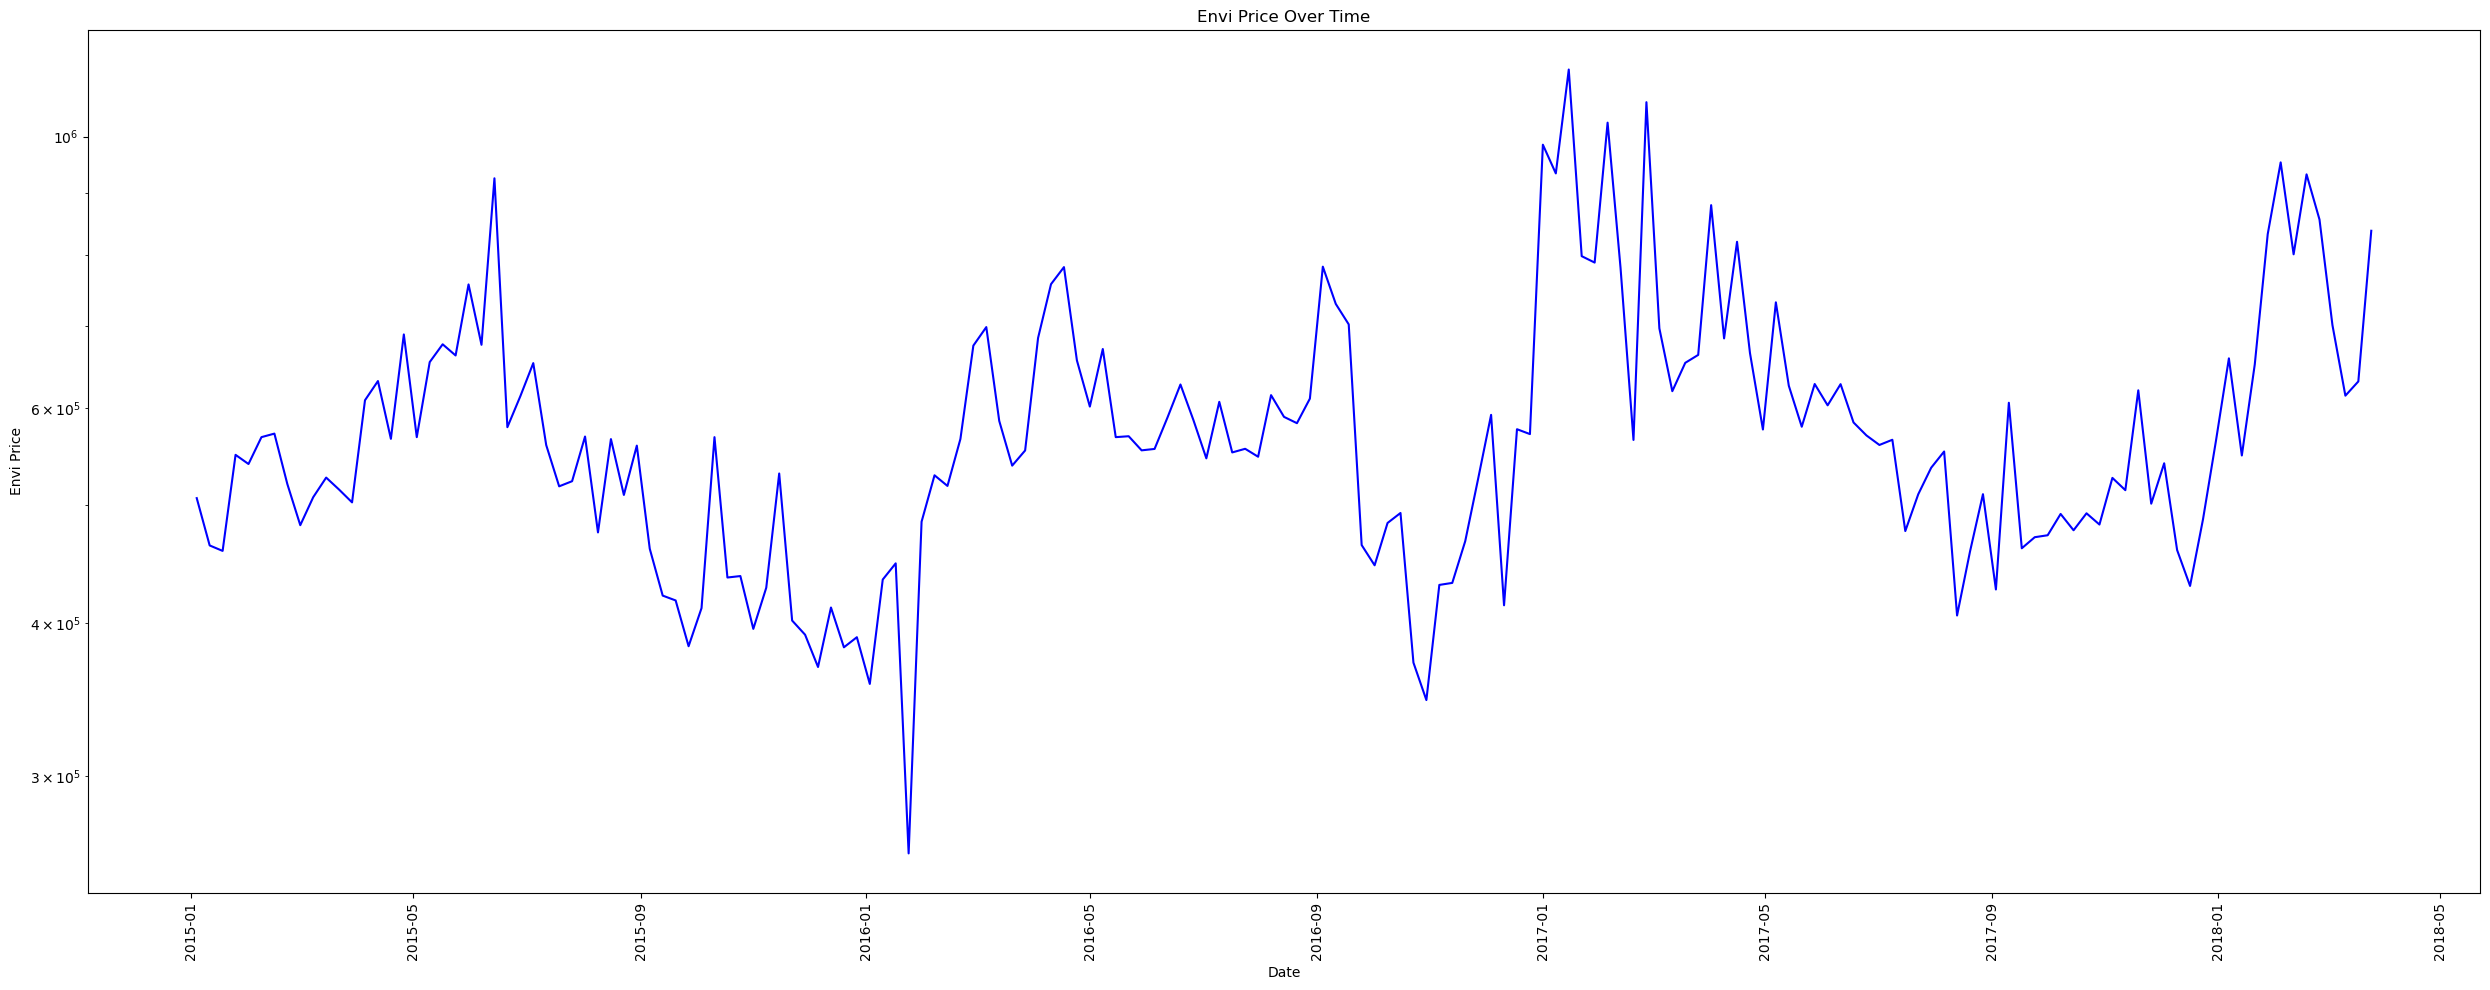

In [64]:
plt.figure(figsize=(25, 10))
plt.plot(netherlands_dataset['Date'], netherlands_dataset['Envi'], color='b')

plt.xlabel('Date')

plt.ylabel('Envi Price')
plt.yscale('log')

plt.title('Envi Price Over Time')
plt.xticks(rotation=90, fontsize=10) 
plt.xticks() 
plt.tight_layout()

plt.show()

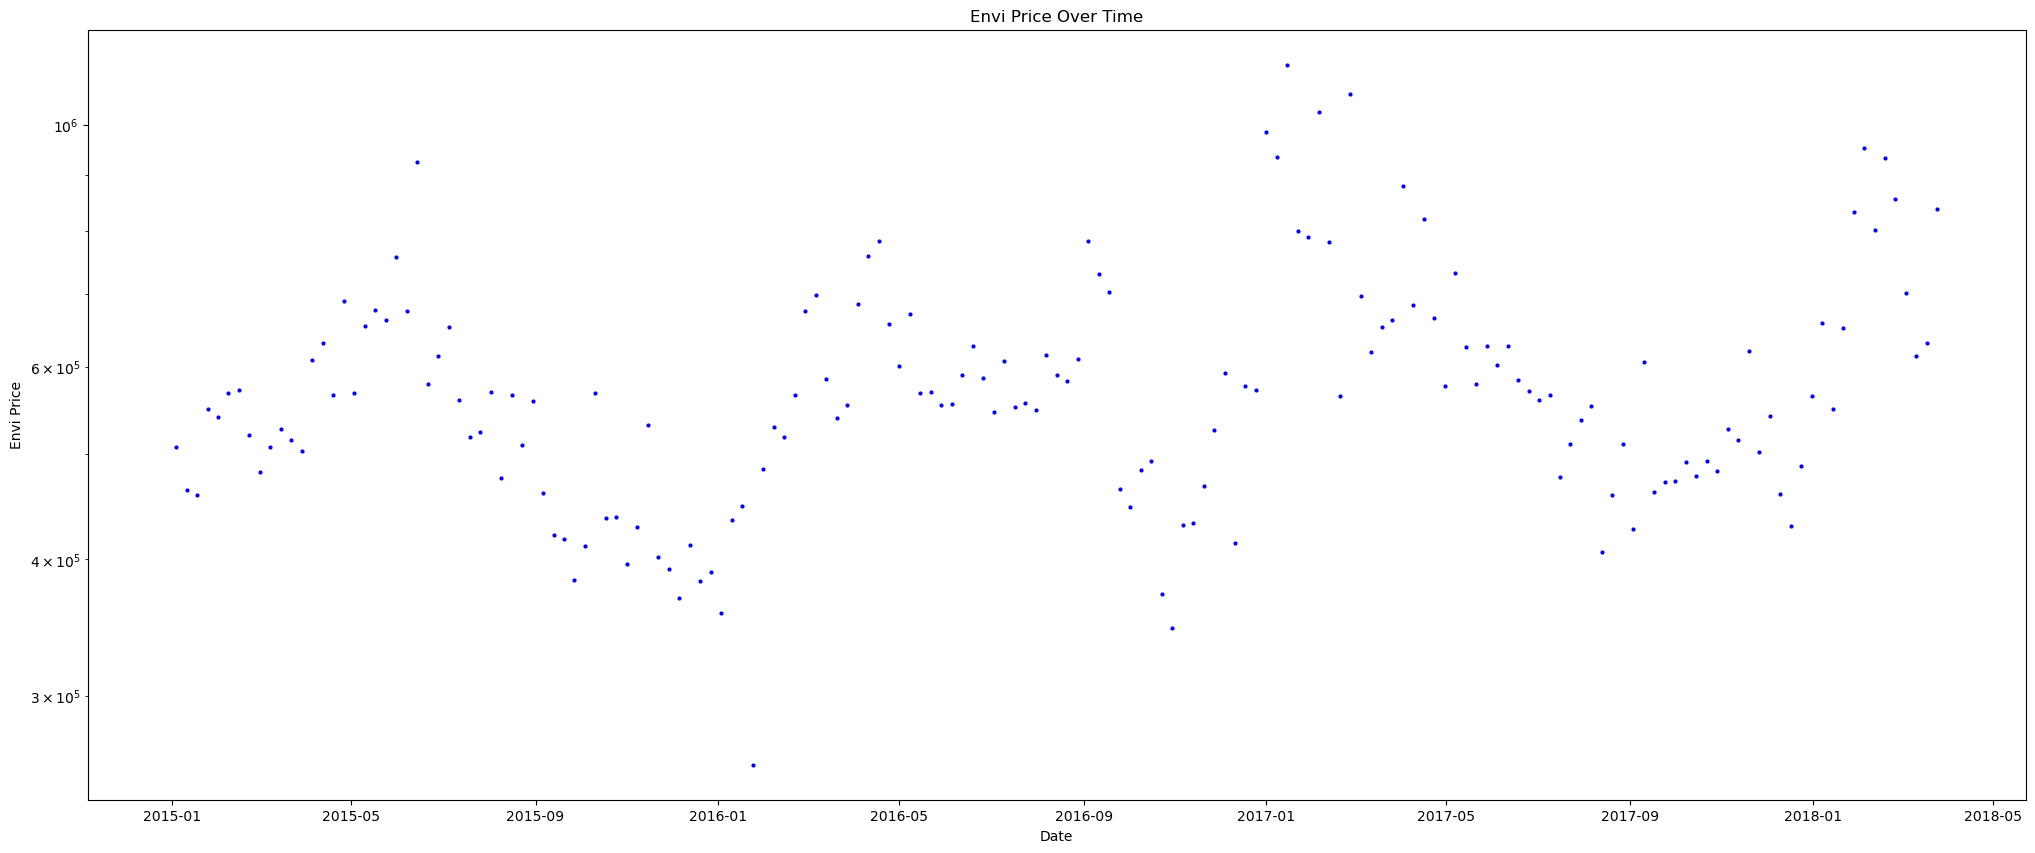

In [59]:
# function สำหรับสร้าง feature เพิ่ม (year, month, day)
def date_parts(data):
    data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')
    data['year'] = data['Date'].dt.year
    data['month'] = data['Date'].dt.month   
    data['day'] = data['Date'].dt.day

date_parts(netherlands_dataset)

df = netherlands_dataset.set_index('Date')

plt.figure(figsize=(25, 10))
plt.scatter(df.index, df['Envi'], alpha=1, s=4, color='b')
plt.xlabel('Date')

plt.ylabel('Envi Price')
plt.yscale('log')

plt.title('Envi Price Over Time')
plt.show()


In [60]:
# Note จำนวน Feature ส่งผลต่อ performance ที่ได้

# Algorithm
from sklearn.tree import DecisionTreeRegressor

# Loss Function
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

netherlands_dataset['Date_ordinal'] = netherlands_dataset['Date'].apply(lambda x: x.toordinal())

netherlands_dataset

train, test = train_test_split(netherlands_dataset, test_size=0.2, random_state=42)

X_train = train[['Date_ordinal']]
y_train = train['Envi']

X_test = test[['Date_ordinal']]
y_test = test['Envi']

dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train, y_train)

dt_pred = dt_reg.predict(X_test)
test['Envi_pred'] = dt_pred

MSE = mean_squared_error(y_test, dt_pred)
print(f'Mean Squared Error: {MSE}')

MAE = mean_absolute_error(y_test, dt_pred)
print(f'Mean Absolute Error: {MAE}')

R2 = r2_score(y_test, dt_pred)
print(f'R2 Score: {MAE}')

test


Mean Squared Error: 8643204464.441177
Mean Absolute Error: 68853.55882352941
R2 Score: 68853.55882352941


,Date,Envi,Fuji,Gala,region,year,month,day,Date_ordinal,Envi_pred
1979,2016-12-04,592360.0,274634.0,4509.0,Netherland,2016,12,4,736302,525325.0
3511,2018-01-14,548774.0,292562.0,6066.0,Netherland,2018,1,14,736708,658829.0
888,2015-11-29,391617.0,289534.0,4335.0,Netherland,2015,11,29,735931,402192.0
899,2015-09-13,421534.0,540499.0,5559.0,Netherland,2015,9,13,735854,417702.0
3093,2017-11-05,526091.0,264224.0,4359.0,Netherland,2017,11,5,736638,481865.0
930,2015-02-08,568029.0,535769.0,5175.0,Netherland,2015,2,8,735637,540024.0
1987,2016-10-09,483285.0,344449.0,9671.0,Netherland,2016,10,9,736246,446277.0
933,2015-01-18,458532.0,429687.0,9354.0,Netherland,2015,1,18,735616,549415.0
2002,2016-06-26,586636.0,216134.0,113474.0,Netherland,2016,6,26,736141,627217.0
3126,2017-03-19,653307.0,183350.0,21365.0,Netherland,2017,3,19,736407,619358.0


In [61]:
# df['Envi_x1'] = df['Envi'].shift(-1, fill_value=0)
# df['Envi_x2'] = df['Envi'].shift(-2, fill_value=0)
# df['Envi_x3'] = df['Envi'].shift(-3, fill_value=0)
# df['Envi_x4'] = df['Envi'].shift(-4, fill_value=0)
# df['Envi_x5'] = df['Envi'].shift(-5, fill_value=0)
# df['Envi_x6'] = df['Envi'].shift(-6, fill_value=0)
# df['Envi_x7'] = df['Envi'].shift(-7, fill_value=0)
# df['Envi_x8'] = df['Envi'].shift(-8, fill_value=0)
# df['Envi_x9'] = df['Envi'].shift(-9, fill_value=0)
# df['Envi_x10'] = df['Envi'].shift(-10, fill_value=0)
# df['Envi_x11'] = df['Envi'].shift(-11, fill_value=0)
# df['Envi_x12'] = df['Envi'].shift(-12, fill_value=0)
# df['Envi_x13'] = df['Envi'].shift(-13, fill_value=0)
# df['Envi_x14'] = df['Envi'].shift(-14, fill_value=0)
# df['Envi_x15'] = df['Envi'].shift(-15, fill_value=0)
# df['Envi_x16'] = df['Envi'].shift(-16, fill_value=0)

# df.drop(df.tail(2).index, inplace=True)

# df

In [62]:
# Algorithm
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge

# Loss Function
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

df.drop(['Fuji', 'Gala', 'region'], axis=1, inplace=True)

df['Date_ordinal'] = df.index.to_series().apply(lambda x: x.toordinal())

train, test = train_test_split(df, test_size=0.15, random_state=42)


X_train = train.drop(['Envi'], axis=1)
y_train = train['Envi']

X_test = test.drop(['Envi'], axis=1)
y_test = test['Envi']

# ทดสอบ Algorithm 
# dt_reg = DecisionTreeRegressor(random_state=42)
# dt_reg = LinearRegression()
# dt_reg = SVR()
# dt_reg = GradientBoostingRegressor()
# dt_reg = MLPRegressor()
dt_reg = RandomForestRegressor()

dt_reg.fit(X_train, y_train)


dt_pred = dt_reg.predict(X_test)

test['Envi_Predicted'] = dt_pred

MSE = mean_squared_error(y_test, dt_pred)
print(f'Mean Squared Error: {MSE}')

MAE = mean_absolute_error(y_test, dt_pred)
print(f'Mean Absolute Error: {MAE}')

R2 = r2_score(y_test, dt_pred)
print(f'R2 Score: {MAE}')

test

Mean Squared Error: 3778930996.590644
Mean Absolute Error: 47240.112692307695
R2 Score: 47240.112692307695


,Envi,year,month,day,Date_ordinal,Envi_Predicted
Date,,,,,,
2016-12-04,592360.0,2016,12,4,736302,469065.70
2018-01-14,548774.0,2018,1,14,736708,723880.56
2015-11-29,391617.0,2015,11,29,735931,399122.36
2015-09-13,421534.0,2015,9,13,735854,500375.38
2017-11-05,526091.0,2017,11,5,736638,520959.64
2015-02-08,568029.0,2015,2,8,735637,536533.21
2016-10-09,483285.0,2016,10,9,736246,438141.28
2015-01-18,458532.0,2015,1,18,735616,486118.29
2016-06-26,586636.0,2016,6,26,736141,604155.14
